# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-12-07 17:00:08.935795


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/6/20


,12/6/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,14757000,282299,1.91
Brazil,6603540,176941,2.68
India,9677203,140573,1.45
Mexico,1175850,109717,9.33
United Kingdom,1727751,61342,3.55
Italy,1728878,60078,3.47
France,2345648,55247,2.36


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 12/6/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
55997,US,14367462,2020-12-04,278932.0,2607.0,227885.0,182663.000000
55996,US,14139577,2020-12-03,276325.0,2879.0,217664.0,179467.142857
55995,US,13921913,2020-12-02,273446.0,2804.0,200055.0,164180.000000
55994,US,13721858,2020-12-01,270642.0,2597.0,180637.0,161498.857143
55993,US,13541221,2020-11-30,268045.0,1172.0,157851.0,160406.142857
55992,US,13383370,2020-11-29,266873.0,826.0,138669.0,162358.142857
55991,US,13244701,2020-11-28,266047.0,1189.0,155880.0,162949.285714


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 12/6/20


,12/6/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,705827,34958.0,4.95
Texas,1322738,23137.0,1.75
California,1366673,19928.0,1.46
Florida,1058074,19177.0,1.81
New Jersey,368016,17321.0,4.71
Illinois,787573,14116.0,1.79
Pennsylvania,423100,11255.0,2.66


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 12/6/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1917,California,1310307,2020-12-04,19734.0,181.0,23757.0,17818.714286
1916,California,1286550,2020-12-03,19553.0,143.0,21368.0,16392.571429
1915,California,1265182,2020-12-02,19410.0,106.0,19140.0,14891.714286
1914,California,1246042,2020-12-01,19304.0,131.0,15778.0,14404.714286
1913,California,1230264,2020-11-30,19173.0,22.0,14809.0,14577.857143
1912,California,1215455,2020-11-29,19151.0,35.0,14831.0,14418.714286
1911,California,1200624,2020-11-28,19116.0,27.0,15048.0,13598.428571


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 12/6/20


,12/6/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,449851,7909.0,1.76
Orange,86878,1633.0,1.88
Riverside,98612,1472.0,1.49
San Bernardino,106770,1175.0,1.10
San Diego,92171,1062.0,1.15
Sacramento,41878,614.0,1.47
Alameda,32781,522.0,1.59


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 12/6/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
6077,Los Angeles,430583,2020-12-04,7842.0,60.0,8702.0,6112.857143
6076,Los Angeles,421881,2020-12-03,7782.0,42.0,7696.0,5515.142857
6075,Los Angeles,414185,2020-12-02,7740.0,40.0,5789.0,5123.142857
6074,Los Angeles,408396,2020-12-01,7700.0,45.0,7477.0,4894.571429
6073,Los Angeles,400919,2020-11-30,7655.0,16.0,5076.0,4326.142857
6072,Los Angeles,395843,2020-11-29,7639.0,16.0,4952.0,4474.714286
6071,Los Angeles,390891,2020-11-28,7623.0,19.0,3098.0,4146.000000
6070,Los Angeles,387793,2020-11-27,7604.0,24.0,4518.0,4334.571429
6069,Los Angeles,383275,2020-11-26,7580.0,37.0,4952.0,4291.857143
6068,Los Angeles,378323,2020-11-25,7543.0,46.0,4189.0,4283.857143



7 day new US cases as of 12/6/20


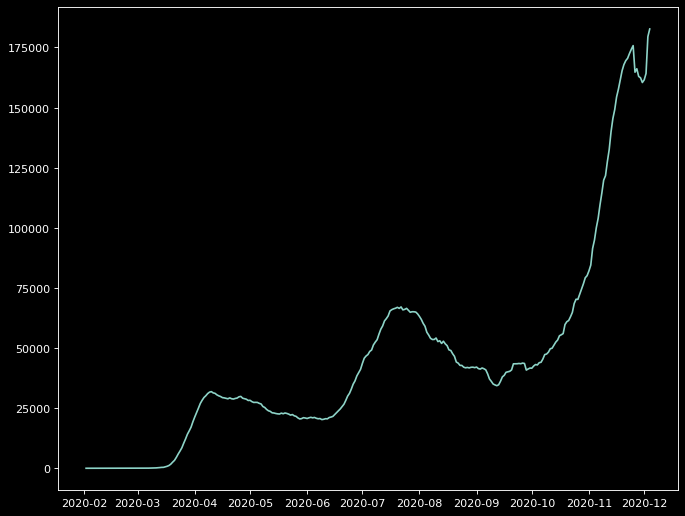

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 12/6/20


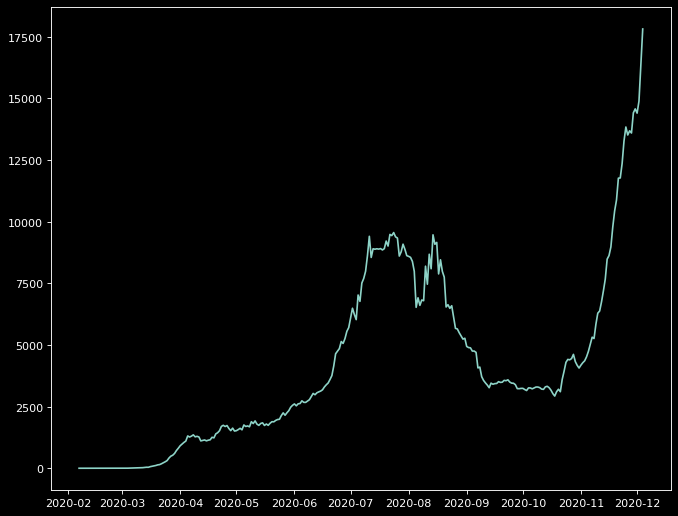

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 12/6/20


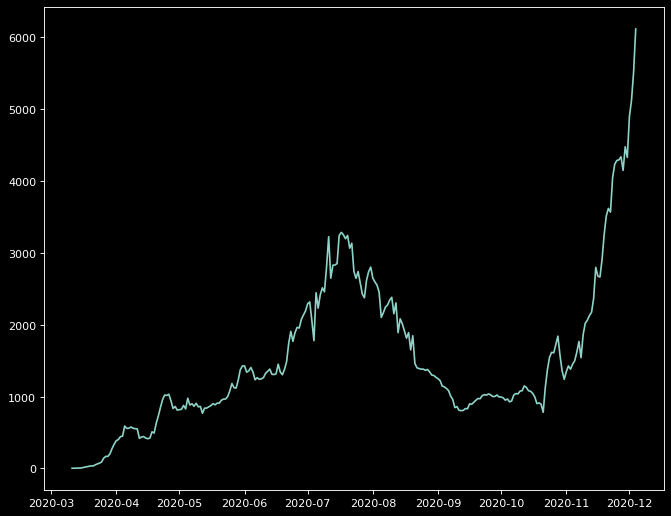

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()